In [1]:
import matplotlib.pyplot as plt
import ast
from glob import glob
from matplotlib import colormaps as cm 
import matplotlib.colors as colors
import matplotlib
import geopandas as gpd

%matplotlib inline

### Note

The most recent version of this notebook was run on small samples and will look wrong.

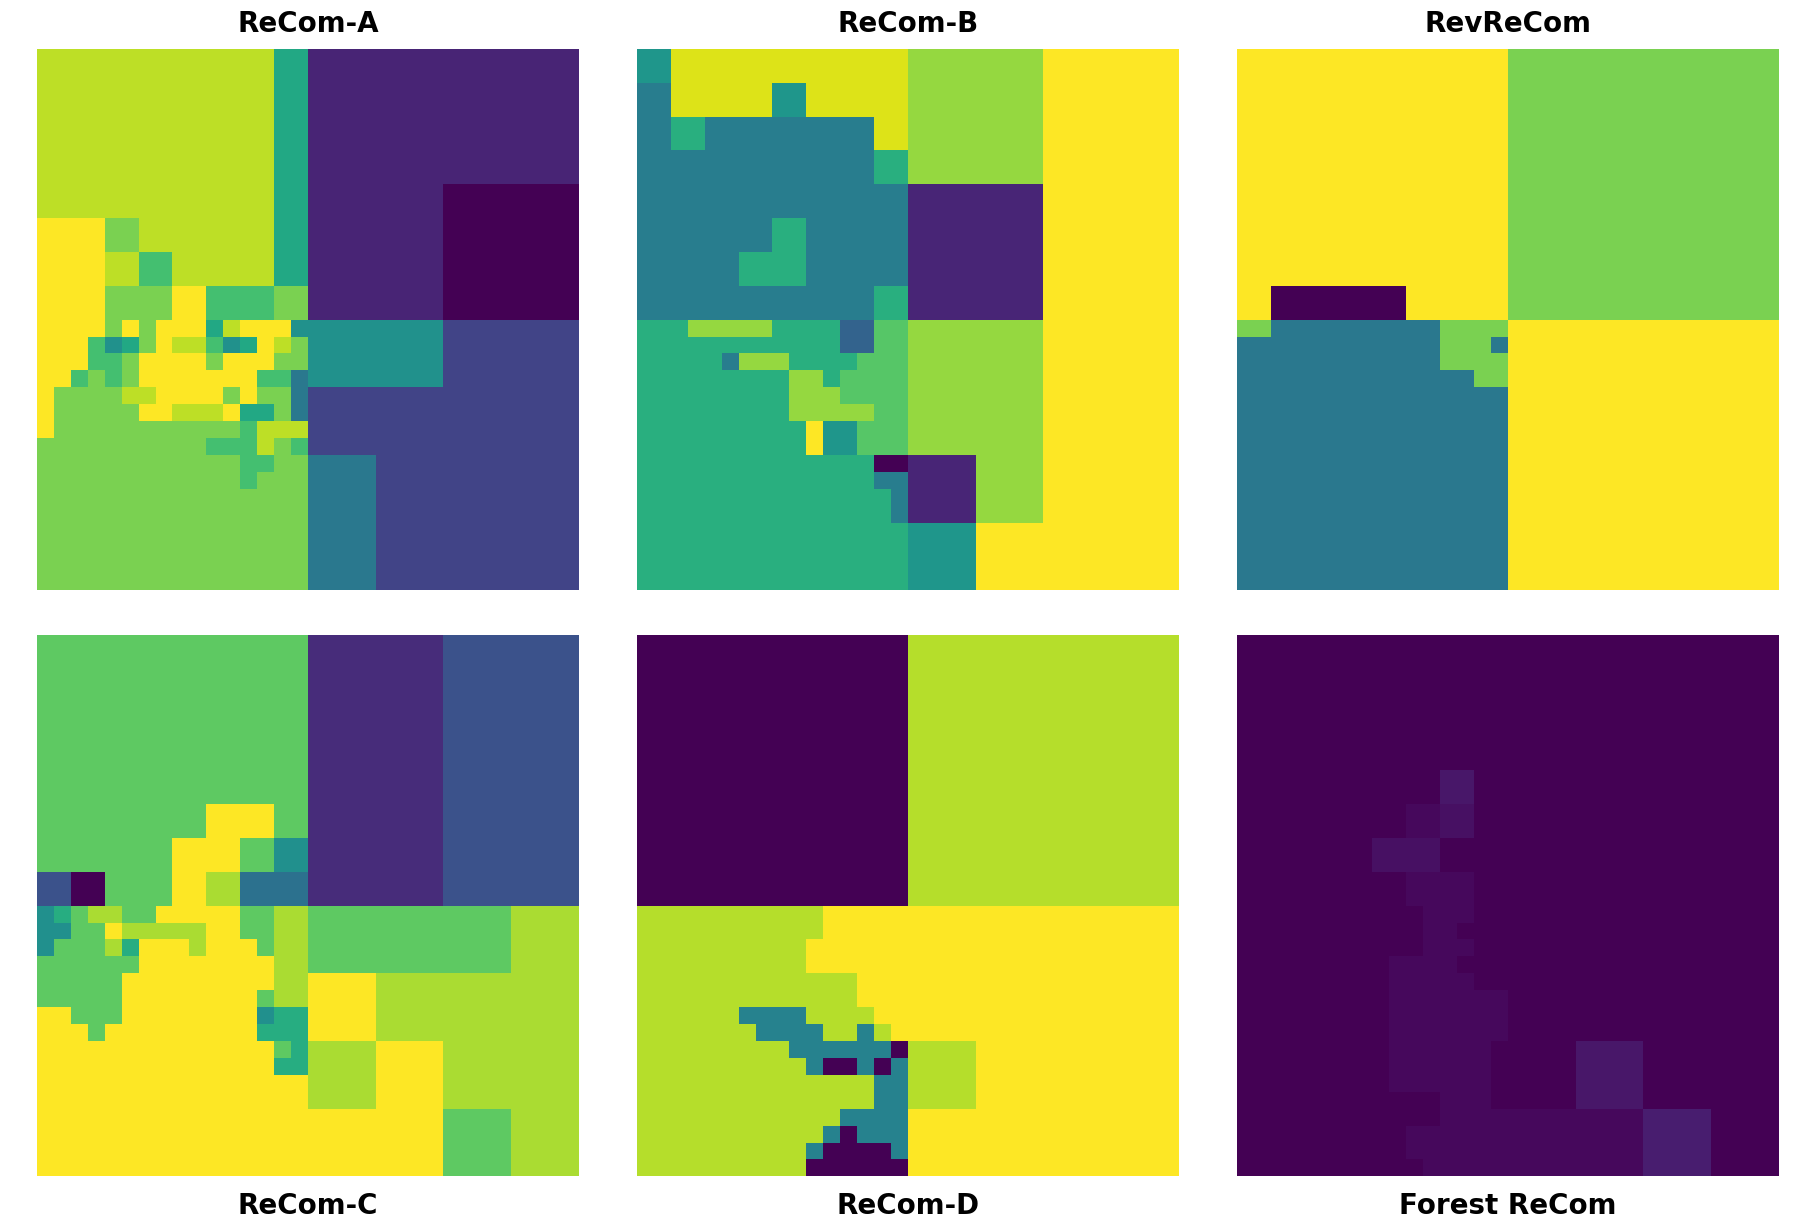

In [2]:
file_list = sorted(glob("./square*changed_assignments.txt"))
new_file_list = [None] * 6

new_order = [0, 1, 5, 2, 3, 4]
for i in range(6):
    new_file_list[i] = file_list[new_order[i]]
file_list = new_file_list

base_file_names = [file.split("/")[-1].split(".")[0] for file in file_list]

flie_to_title = {
    "square_A_10M_changed_assignments": "ReCom-A",
    "square_B_10M_changed_assignments": "ReCom-B",
    "square_C_10M_changed_assignments": "ReCom-C",
    "square_D_10M_changed_assignments": "ReCom-D",
    "square_rev_1B_changed_assignments": "RevReCom",
    "square_multigraph_1M_jl_changed_assignments": "Forest ReCom"
}


fig, ax = plt.subplots(2, 3, figsize=(18, 12)) 

square_gdf = gpd.read_file("./square_multigrid/square_multigrid.shp")

for i, file in enumerate(file_list):
    with open(file, "r") as f:
        sq_data = f.readline()
        sq_data = ast.literal_eval(sq_data)
    
    square_gdf["reassign"] = sq_data
    
    col_pos = i%3
    row_pos = i//3
    
    square_gdf.plot(ax=ax[row_pos, col_pos], column="reassign", cmap="viridis", vmax=0.5)
    ax[row_pos, col_pos].set_xticks([])
    ax[row_pos, col_pos].set_yticks([])
    ax[row_pos, col_pos].spines['top'].set_visible(False)
    ax[row_pos, col_pos].spines['right'].set_visible(False)
    ax[row_pos, col_pos].spines['bottom'].set_visible(False)
    ax[row_pos, col_pos].spines['left'].set_visible(False)
    file_name = file.split("/")[-1].split(".")[0]
    if row_pos > 0:
        ax[row_pos, col_pos].set_title(flie_to_title[file_name], y=-0.03, size=20, weight="bold")
    else:
        ax[row_pos, col_pos].set_title(flie_to_title[file_name], y=0.97, size=20, weight="bold")

plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
plt.savefig("./figures/grid_graph_heat_all.png", bbox_inches="tight")

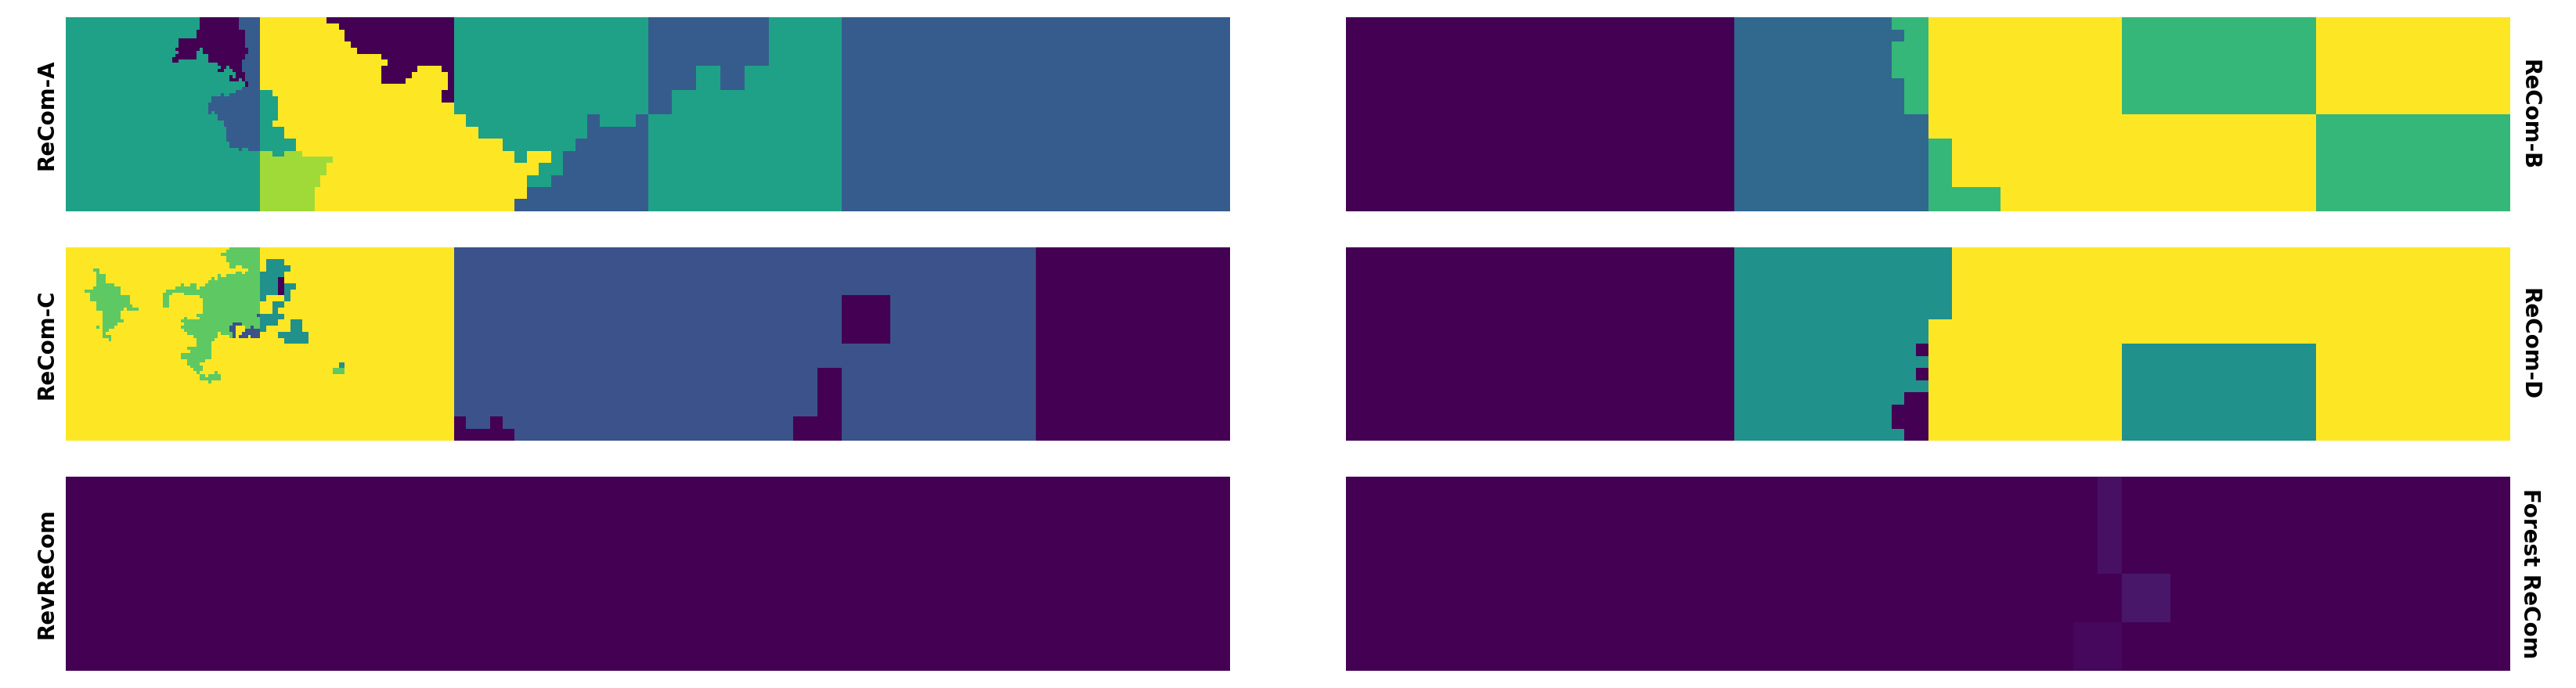

In [3]:
file_list = sorted(glob("./linear*changed_assignments.txt"))
new_file_list = [None] * 6

new_order = [0, 1, 5, 2, 3, 4]
file_list[-1], file_list[-2] = file_list[-2], file_list[-1]

base_file_names = [file.split("/")[-1].split(".")[0] for file in file_list]

flie_to_title = {
    "linear_A_10M_changed_assignments": "ReCom-A",
    "linear_B_10M_changed_assignments": "ReCom-B",
    "linear_C_10M_changed_assignments": "ReCom-C",
    "linear_D_10M_changed_assignments": "ReCom-D",
    "linear_rev_1B_changed_assignments": "RevReCom",
    "linear_multigraph_1M_jl_changed_assignments": "Forest ReCom"
}


fig, ax = plt.subplots(3, 2, figsize=(33, 9)) 



linear_gdf = gpd.read_file("./linear_multigrid/linear_multigrid.shp")

for i, file in enumerate(file_list):
    with open(file, "r") as f:
        lin_data = f.readline()
        lin_data = ast.literal_eval(lin_data)
    
    linear_gdf["reassign"] = lin_data
    
    col_pos = i%2
    row_pos = i//2
    
    linear_gdf.plot(ax=ax[row_pos, col_pos], column="reassign", cmap="viridis", vmax=0.5)
    ax[row_pos, col_pos].set_xticks([])
    ax[row_pos, col_pos].set_yticks([])
    ax[row_pos, col_pos].spines['top'].set_visible(False)
    ax[row_pos, col_pos].spines['right'].set_visible(False)
    ax[row_pos, col_pos].spines['bottom'].set_visible(False)
    ax[row_pos, col_pos].spines['left'].set_visible(False)
    file_name = file.split("/")[-1].split(".")[0]
    if col_pos == 0:
        ax[row_pos, col_pos].text(
            0.03, 0.5, 
            flie_to_title[file_name],
            transform=ax[row_pos, col_pos].transAxes,
            rotation=90,
            ha='center',
            va='center',
            weight='bold',
            fontsize=20
        )

    else:
        ax[row_pos, col_pos].text(
            0.97, 0.5, 
            flie_to_title[file_name],
            transform=ax[row_pos, col_pos].transAxes,
            rotation=270,
            ha='center',
            va='center',
            weight='bold',
            fontsize=20
        )

plt.tight_layout(w_pad=0)
plt.savefig("./figures/linear_graph_heat_all.png", bbox_inches="tight")

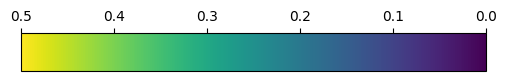

In [4]:
norm = colors.Normalize(vmin=0, vmax=0.5)
cmap = cm.get_cmap('viridis')

sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, cax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
cbar.ax.invert_xaxis()

plt.savefig("./figures/multigrid_heatbar.png", bbox_inches="tight")